In [1]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import skimage

sys.path.append("../")
import src.plot as myplot
import seaborn as sns

import sklearn

In [2]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/../src/plot.py'>

In [3]:

import importlib
import src.paper_utils as utils
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/../src/paper_utils.py'>

In [4]:
sample_sizes = [5423]
counts_samplesizes, mcms_samplesizes = utils.load_counts_mcm(sample_sizes, letter="", path_format="../data/Output/mcm/sample_sizes")
atest_mcms, atest_probs = utils.get_complete_testprobs(mcms_samplesizes,counts_samplesizes,sample_sizes,n_runs=2,smooth=True)

In [5]:
test_mcms = atest_mcms[:,0,0]
test_probs = atest_probs[:,0,0]


In [6]:
# test_probs[0,0,:,0]
# full_mcm_idx = [np.where(test_probs[mcm_i,0,:,0] == -1,)[0][0]-1 for mcm_i in range(10)]
# test_probs.shape

In [7]:
per_image_prob = np.product(test_probs,axis=2,where=test_probs!=-1) # this correct be cause get_complete_testprobs gives the probability for each icc

In [8]:
# digitwise accuracy
max_decision_unit = np.argmax(per_image_prob,axis=0) # out of the 10 mcm seeing the same digit, which one was the most probable
digit_accu = [1-np.count_nonzero(max_decision_unit[k,:] - k)/892 for k in range(10)]
digit_accu
# np.mean(digit_accu)

[0.9730941704035875,
 0.9775784753363229,
 0.9495515695067265,
 0.929372197309417,
 0.9226457399103138,
 0.9204035874439462,
 0.945067264573991,
 0.9047085201793722,
 0.8878923766816144,
 0.8957399103139013]

In [10]:
# predicted_labels_per_image
# unqs

In [19]:
# for every set of testimages, compute 

# the most likely label the NB classifier gave to each image (10, 892)
predicted_labels_per_image = np.argmax(per_image_prob,axis=0)

# np.unique(arr, return_counts=True)
v, c = np.unique(predicted_labels_per_image, return_counts=True,axis=1)
# list of tuples: each tuple is each wrong label:count how often each label
unqs = [np.unique(arr, return_counts=True) for arr in predicted_labels_per_image]

idx_arr = np.zeros((10,10))
for i in range(10):
    idx_arr[i][unqs[i][0]] = unqs[i][1]

idx_arr /= 982

#
np.fill_diagonal(idx_arr, 0)
# np.fill_diagonal(idx_arr,idx_arr.max())
idx_arr


# unqs[i][0]

array([[0.        , 0.        , 0.00305499, 0.00101833, 0.        ,
        0.00509165, 0.00305499, 0.00203666, 0.00916497, 0.00101833],
       [0.        , 0.        , 0.00610998, 0.00101833, 0.00101833,
        0.        , 0.00305499, 0.00101833, 0.00814664, 0.        ],
       [0.00407332, 0.00203666, 0.        , 0.0101833 , 0.00610998,
        0.00101833, 0.00305499, 0.00814664, 0.0101833 , 0.00101833],
       [0.00101833, 0.        , 0.01527495, 0.        , 0.00101833,
        0.0305499 , 0.        , 0.00610998, 0.00916497, 0.00101833],
       [0.        , 0.00101833, 0.00407332, 0.00101833, 0.        ,
        0.00101833, 0.00814664, 0.00407332, 0.00916497, 0.04175153],
       [0.00814664, 0.00203666, 0.        , 0.02647658, 0.        ,
        0.        , 0.00814664, 0.        , 0.02240326, 0.00509165],
       [0.01120163, 0.00407332, 0.00407332, 0.00203666, 0.00407332,
        0.01221996, 0.        , 0.00101833, 0.01120163, 0.        ],
       [0.00101833, 0.00712831, 0.0193482

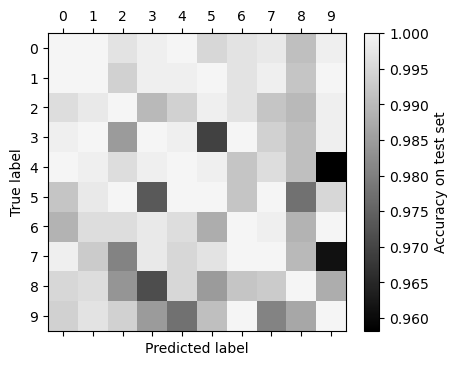

In [26]:

im = myplot.plot_confusion_matrix(1-idx_arr,10,logScale=False,cmap=myplot.cmap_to_gray("black",reverse=False), title="")#,title="Confusion matrix:\n MCM(n=5423) on test set")
plt.colorbar(im,shrink=.8).set_label("Accuracy on test set")
plt.savefig("./img/confusion_testacc.png",dpi=300, bbox_inches="tight")